<a href="https://colab.research.google.com/github/nkorzounUD/DSPS_NKorzoun/blob/main/HW4/GalaxyRotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

Amended by Andrew Crossman @AndrewCrossman, Ben Flaggs @bflaggs, Nik Korzoun @nkorzounUD, Connor Mooney @comooney711
# testing the significance of Dark Matter

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline
#package I will use for constants and units conversion 
import astropy
from astropy import units as u

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v^2\propto\frac{1}{r}$ from Newton's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

**SOLUTION:**

*When an object rotates in a circle it feels a force excerted on it radially inwards. This is know as the Centripetal Force whose magnitude is given as:*

$F_{c}=\frac{m\cdot V^2}{r}$ 

*When that Centripetal Force is caused by gravity, such as in the case of a star rotating at the edges of a galaxy, then we can equate it to the gravitational force:*

$F_{c}=\frac{M_{1} \cdot V^2}{r}$
$=\frac{G\cdot M_{1}\cdot M_{2}}{r^2}$
$=F_{G}$

*Now if we isolate $V$, and assume that $ M_{2} $ is a function of $r$ (i.e. $M_{2}=m(r)$), then we find that:*

$V^2=\frac{G \cdot m(r)}{r}$

*Hence,*

$V^2\propto \frac{1}{r}$

## M31 rotational curve

# Galaxy Rotational Curves
The data comes from [SOFUE 2015](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/2015-pasj-M31MW-DH.pdf)
The data are plotted in Figure 3 and 4 for M31 and the Milky Way respectively, and hosted on [this website](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/)
As described in the paper: 
Long and short bars represent modified standard deviations and errors, respectively

#### Please read the last paragraphs of Section 2.1 of the paper to understand the meaning of these uncertainties:

![figures](https://github.com/fedhere/DSPS_FBianco/blob/master/HW4/figures.png?raw=1)





![text](https://github.com/fedhere/DSPS_FBianco/blob/master/HW4/text.png?raw=1)

### data ingestion
Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [ ]:
# your code here
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/m31.csv",sep=",")

In [ ]:
m31.head()

,#M31,Grand,Rotation,Curve
0,#R(kpc,V(km/s),St.dev.,St.error
1,0.100,183.939,0.000,0.000
2,0.120,190.710,10.265,12.191
3,0.144,204.141,22.634,21.808
4,0.173,207.601,4.573,4.200


In [ ]:
# Rename columns
m31 = m31[['#M31', 'Grand', 'Rotation', 'Curve']].rename(
    {'#M31':"r", 'Grand':"v", 'Rotation':"dv", 'Curve':"err"}, axis=1)

# Remove first row (no data in first row)
m31 = m31.iloc[1:]
m31 = m31.reset_index().drop(['index'], axis=1)


# Change all data in the dataframe to floats
m31 = m31.astype(float)

In [ ]:
m31.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


In [ ]:
m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   
 

In [ ]:
apparentSizeM31 = 3.167 #deg
distanceM31 = 765 #kpc 

In [ ]:
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [ ]:
sigmaDistanceM31 = 28 #kpc

In [ ]:
m31size = m31angS.to(u.rad).value * distanceM31 * u.kpc
sigmaM31size = abs(m31size) * np.sqrt((sigmaDistanceM31 / distanceM31)**2)
print(f"Size of the visible component of Andromeda: {m31size:.2f} +/- {sigmaM31size:.2f}" )

Size of the visible component of Andromeda: 42.29 kpc +/- 1.55 kpc


Print the distance like I printed the angular size. 

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles 


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc). 


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. takes as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [ ]:
def getradii(gal, gsize, n):
  '''Gets the radius and velocity with respective uncertainties.

  Parameters:
  gal   -- name of the pandas dataframe for the galaxy  
  gsize -- size of the luminous component of the galaxy
  n     -- find radius at this value times gsize

  Returns:
  minR      -- minimum radius greater than n*gsize
  sigmaMinR -- uncertainty in the minimum radius
  vel       -- velocity at the minimum radius
  sigmaVel  -- uncertainty in the velocity
  '''

  dfCut = gal[gal.r > n * gsize]
  dfCut = dfCut.reset_index().drop(['index'], axis=1)

  minidx = int( dfCut["r"].idxmin() )
  minR = dfCut["r"].iloc[minidx]

  sigmaMinR = dfCut["err"].iloc[minidx]

  vel = dfCut["v"].iloc[minidx]
  sigmaVel = dfCut["dv"].iloc[minidx]

  return minR, sigmaMinR, vel, sigmaVel


In [ ]:
m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color. 

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

In [ ]:
m31size.value
tmp = m31[m31['r'] < 150]
max = tmp["dv"].idxmax()
tmp.iloc[max]

r       85.056
v      206.603
dv     135.003
err     27.258
Name: 37, dtype: float64

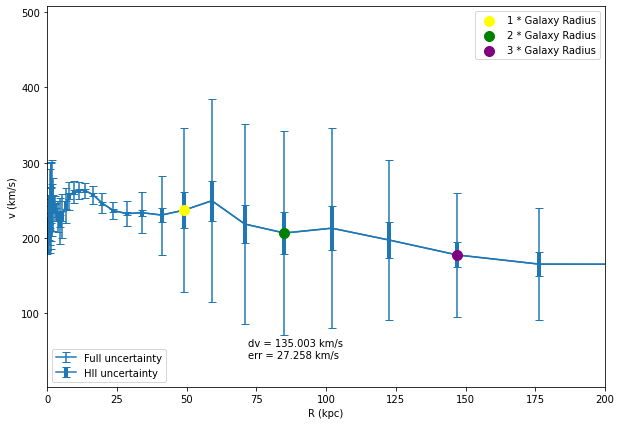

In [ ]:
def plotGal(gal, rds):

  minR1, sigmaMinR1, vel1, sigmaVel1 = getradii(gal, rds, 1)
  minR2, sigmaMinR2, vel2, sigmaVel2 = getradii(gal, rds, 2)
  minR3, sigmaMinR3, vel3, sigmaVel3 = getradii(gal, rds, 3)

  rarray=np.array([minR1, minR2, minR3])
  varray=np.array([vel1, vel2, vel3])

  dfCut = gal
  #dfCut = gal[gal.r > rds]
  #dfCut = dfCut.reset_index().drop(['index'], axis=1)
  
  plt.figure(figsize=(10, 7))
  pts1 = plt.scatter(rarray[0], varray[0], color = ['yellow'], s=100, zorder=10, label = '1 * Galaxy Radius')
  pts2 = plt.scatter(rarray[1], varray[1], color = ['green'], s=100, zorder=10, label = '2 * Galaxy Radius')
  pts3 = plt.scatter(rarray[2], varray[2], color = ['purple'], s=100, zorder=10, label = '3 * Galaxy Radius')

  err1 = plt.errorbar(dfCut["r"],dfCut["v"],yerr = dfCut["dv"], fmt='tab:blue', capsize=4, label = 'Full uncertainty')
  err2 = plt.errorbar(dfCut["r"],dfCut["v"],yerr = dfCut["err"], fmt='tab:blue', elinewidth=4, capsize=4, label = 'HII uncertainty')
  plt.xlim([0, 200])

  pts_legend = plt.legend(handles=[pts1,pts2,pts3], loc=1)
  ax = plt.gca().add_artist(pts_legend)
  plt.legend(handles=[err1,err2], loc='lower left')
  
  plt.xlabel("R (kpc)")
  plt.ylabel("v (km/s)")
  # uncomment to combine legends
  # plt.legend()

  plt.text(72,56,"dv = 135.003 km/s")
  plt.text(72,40, "err = 27.258 km/s")
  plt.show()

  return

plotGal(m31, m31size.value)

## Figure 1: Galaxy Rotation Curve for the Andromeda Galaxy

Write a function that for a given dataset and a given luminous radius and a given N 
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius, 
  
  2) states the expected drop in rotational velocities according to Newton's law $v^2\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties, 
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v^2 \propto 1/r$
  
Your function should print 

     - the expected ratio based on the radii, 
     - the calculated ratio using ```dv```, and its uncertainty, - 
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio, 
  5) and the same using ```err```  instead of ```dv```

In [ ]:
def vratios(gal, gsize, n, err='dv'):
  '''Prints whether the expected and experimental rotational velocity ratios are in agreement

  Parameters:
  gal   -- name of the pandas dataframe for the galaxy  
  gsize -- size of the luminous component of the galaxy
  n     -- find radius at this value times gsize
  err {'dv' , 'err' }  -- type of uncertainty to use to qualify agreement
  '''
  minR_1, sigmaMinR_1, vel_1, sigmaVel_1 = getradii(gal, gsize, 1)
  minR_n, sigmaMinR_n, vel_n, sigmaVel_n = getradii(gal, gsize, n)

  # expected ratio from radii
  expected = (1/minR_n)/(1/minR_1)
  # calculated ratio from velocities
  vel2_1 = (vel_1)*(vel_1)
  vel2_n = (vel_n)*(vel_n)
  calculated = vel2_n / vel2_1

  if(err=='dv'):
    tmp1 = vel2_1 * np.sqrt(2* ((sigmaVel_1)*(sigmaVel_1)) / ((vel_1)*(vel_1))) #propogate error from squaring
    tmp2 = vel2_n * np.sqrt(2* ((sigmaVel_n)*(sigmaVel_n)) / ((vel_n)*(vel_n))) #propogate error from squaring
  elif(err=='err'):
    tmp1 = vel2_1 * np.sqrt(2* ((sigmaMinR_1)*(sigmaMinR_1)) / ((vel_1)*(vel_1))) #propogate error from squaring
    tmp2 = vel2_n * np.sqrt(2* ((sigmaMinR_n)*(sigmaMinR_n)) / ((vel_n)*(vel_n))) #propogate error from squaring
  else:
    print("Unrecognised error, err or dv expected. Terminating function")
    return

  calculated1sigma = calculated * np.sqrt(((tmp1)*(tmp1))/((vel2_1)*(vel2_1)) + ((tmp2)*(tmp2))/((vel2_n)*(vel2_n))) #propogate error from division
  # calculated1sigma = ((sigmaVel_n*sigmaVel_n)/((sigmaVel_1)*(sigmaVel_1))) # dont propogate error?
  # calculated1sigma = ((sigmaMinR_n*sigmaMinR_n)/((sigmaMinR_1)*(sigmaMinR_1))) # dont propogate error?
  calculated2sigma = 2*calculated1sigma

  #print calculations and conclude agreement
  print("Expected 1/r drop from " +str(n)+ f" galaxy radii to one radius: {expected:.2f}")
  print("Calculated v^2 drop from " +str(n)+ f" galaxy radii to one radius: {calculated:.2f} +/- {calculated2sigma:.2f}")
  if(expected > calculated - calculated2sigma and expected < calculated + calculated2sigma):
    print("Expected drop is within 2 sigma of the calculated ratio: values are in agreement")
  else:
    print("Expected drop is not within 2 sigma of the calculated ratio: values are not in agreement")
    

In [ ]:
# your code here
vratios(m31, m31size.value, 1,err='dv')
print("--------------------------------")
vratios(m31, m31size.value, 1,err='err')
print("--------------------------------")

vratios(m31, m31size.value, 2,err='dv')
print("--------------------------------")
vratios(m31, m31size.value, 2,err='err')
print("--------------------------------")

vratios(m31, m31size.value, 3,err='dv')
print("--------------------------------")
vratios(m31, m31size.value, 3,err='err')
print("--------------------------------")

Expected 1/r drop from 1 galaxy radii to one radius: 1.00
Calculated v^2 drop from 1 galaxy radii to one radius: 1.00 +/- 1.85
Expected drop is within 2 sigma of the calculated ratio: values are in agreement
--------------------------------
Expected 1/r drop from 1 galaxy radii to one radius: 1.00
Calculated v^2 drop from 1 galaxy radii to one radius: 1.00 +/- 0.40
Expected drop is within 2 sigma of the calculated ratio: values are in agreement
--------------------------------
Expected 1/r drop from 2 galaxy radii to one radius: 0.58
Calculated v^2 drop from 2 galaxy radii to one radius: 0.76 +/- 1.72
Expected drop is within 2 sigma of the calculated ratio: values are in agreement
--------------------------------
Expected 1/r drop from 2 galaxy radii to one radius: 0.58
Calculated v^2 drop from 2 galaxy radii to one radius: 0.76 +/- 0.36
Expected drop is within 2 sigma of the calculated ratio: values are in agreement
--------------------------------
Expected 1/r drop from 3 galaxy radi

### Discuss!

### The calculated velocities agree with the expected 1/r drop when strictly looking at the uncertainty in the location of the HII line, but when taking all uncertainty into account, the velocities are no longer in agreement once 3 galaxy radii have been reached - indicating the Newtonian model is incomplete for the Andromeda galaxy.

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [ ]:
# read data
mw = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/mw.csv",sep=",")

# Rename columns
mw = mw[['#MW', 'Grand', 'Rotation', 'Curve']].rename(
    {'#MW':"r", 'Grand':"v", 'Rotation':"dv", 'Curve':"err"}, axis=1)

# Remove first row (no data in first row)
mw = mw.iloc[1:]
mw = mw.reset_index().drop(['index'], axis=1)

# Change all data in the dataframe to floats
mw = mw.astype(float)

mw.head()

,r,v,dv,err
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [ ]:
# get size in parsecs

# From https://en.wikipedia.org/wiki/Milky_Way
mwsize= 185 #kly

mwsize = (mwsize * u.klyr).to(u.kpc)
mwsize.value

56.721257850326865

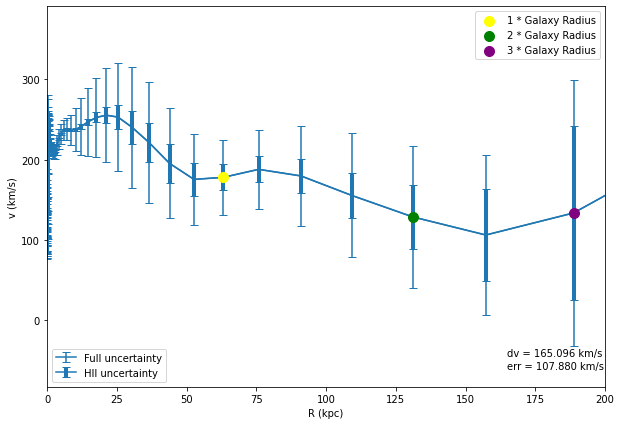

In [ ]:
# plot
def plotGalMW(gal, rds):

  minR1, sigmaMinR1, vel1, sigmaVel1 = getradii(gal, rds, 1)
  minR2, sigmaMinR2, vel2, sigmaVel2 = getradii(gal, rds, 2)
  minR3, sigmaMinR3, vel3, sigmaVel3 = getradii(gal, rds, 3)

  rarray=np.array([minR1, minR2, minR3])
  varray=np.array([vel1, vel2, vel3])

  dfCut = gal
  #dfCut = gal[gal.r > rds]
  #dfCut = dfCut.reset_index().drop(['index'], axis=1)
  
  plt.figure(figsize=(10, 7))
  pts1 = plt.scatter(rarray[0], varray[0], color = ['yellow'], s=100, zorder=10, label = '1 * Galaxy Radius')
  pts2 = plt.scatter(rarray[1], varray[1], color = ['green'], s=100, zorder=10, label = '2 * Galaxy Radius')
  pts3 = plt.scatter(rarray[2], varray[2], color = ['purple'], s=100, zorder=10, label = '3 * Galaxy Radius')

  err1 = plt.errorbar(dfCut["r"],dfCut["v"],yerr = dfCut["dv"], fmt='tab:blue', capsize=4, label = 'Full uncertainty')
  err2 = plt.errorbar(dfCut["r"],dfCut["v"],yerr = dfCut["err"], fmt='tab:blue', elinewidth=4, capsize=4, label = 'HII uncertainty')
  plt.xlim([0, 200])

  pts_legend = plt.legend(handles=[pts1,pts2,pts3], loc=1)
  ax = plt.gca().add_artist(pts_legend)
  plt.legend(handles=[err1,err2], loc='lower left')
  
  plt.xlabel("R (kpc)")
  plt.ylabel("v (km/s)")
  # uncomment to combine legends
  # plt.legend()

  plt.text(165,-45,"dv = 165.096 km/s")
  plt.text(165,-61, "err = 107.880 km/s")
  plt.show()

  return

plotGalMW(mw, mwsize.value)

## Figure 2: Galaxy Rotation Curve for the Milky Way Galaxy

In [ ]:
# agreement?
vratios(mw, mwsize.value, 5,err='dv')
print("--------------------------------")
vratios(mw, mwsize.value, 5,err='err')
print("--------------------------------")

vratios(mw, mwsize.value, 9,err='dv')
print("--------------------------------")
vratios(mw, mwsize.value, 9,err='err')
print("--------------------------------")

vratios(mw, mwsize.value, 10,err='dv')
print("--------------------------------")
vratios(mw, mwsize.value, 10,err='err')
print("--------------------------------")

Expected 1/r drop from 5 galaxy radii to one radius: 0.13
Calculated v^2 drop from 5 galaxy radii to one radius: 0.27 +/- 1.30
Expected drop is within 2 sigma of the calculated ratio: values are in agreement
--------------------------------
Expected 1/r drop from 5 galaxy radii to one radius: 0.13
Calculated v^2 drop from 5 galaxy radii to one radius: 0.27 +/- 0.80
Expected drop is within 2 sigma of the calculated ratio: values are in agreement
--------------------------------
Expected 1/r drop from 9 galaxy radii to one radius: 0.11
Calculated v^2 drop from 9 galaxy radii to one radius: 0.55 +/- 1.53
Expected drop is within 2 sigma of the calculated ratio: values are in agreement
--------------------------------
Expected 1/r drop from 9 galaxy radii to one radius: 0.11
Calculated v^2 drop from 9 galaxy radii to one radius: 0.55 +/- 0.70
Expected drop is within 2 sigma of the calculated ratio: values are in agreement
--------------------------------
Expected 1/r drop from 10 galaxy rad

### The calculated velocities agree with the expected 1/r drop when strictly looking at the uncertainty in the location of the HII line, but when taking all uncertainty into account, the velocities are no longer in agreement once 10 galaxy radii have been reached - indicating the Newtonian model is incomplete for the Milky Way galaxy and whatever the cause (dark matter) has a stronger effect on the Andomeda galaxy than the Milky Way.